# This notebook analyzes data from video game sales across North America, Europe, and Japan.

## In it, I attempt to answer three questions:

1. What are some major differences between the North American, European, and Japanese video game markets?

2. What video game genres are trending in each market?

3. What features about a video game are most indicative of its success?

1. I found that video game sales are highest in the North American market, follow by Europe, then Japan. North America and Europe show similar trends for popular games, while Japan is more heavily focused on Pokemon games. Although Nintendo dominates all three markets, the top publishers in Japan are marketedly different than from North America and Europe.

2. In the past decade, action, sports, and shooter games have gained increased popularity in North America and Europe. Shooter games are interestingly, one of the least popular games in Japan. Interestingly, role paying games are extremely popular in Japan, even moreso in recent years, whereas the market for this genre is not as strong in Europe and North America.

3. I planned to build three models to predict sales in each region. The first model for N. America sales was not fruitful, and I abandoned this plan expecting others to follow the same. Based on EDA, genre, publisher, and 

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [4]:
# change the directory to where the data files are stored
path = "/Users/camilletoarmino/Google Drive/Insight Data Science /data_challenges/data_challenge_3"
os.chdir(path)

In [122]:
vg = pd.read_csv("vgsales.csv")

In [9]:
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


There are missing values for year and publisher. 

In [123]:
# small amount of missing data, dropping
vg = vg.dropna()

In [13]:
vg.describe(include="all")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291,16291,16291.000000,16291,16291,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
unique,NaN,11325,31,NaN,12,576,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2131,NaN,3251,1339,NaN,NaN,NaN,NaN,NaN
mean,8290.190228,NaN,NaN,2006.405561,NaN,NaN,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,NaN,NaN,5.832412,NaN,NaN,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.480000


## 1. Exploratory Analyses

### What percentage does it market make up of all global sales?

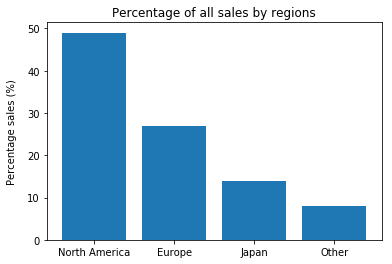

In [60]:
total_global = vg.Global_Sales.sum()
total_NA_sales = vg.NA_Sales.sum()
total_EU_sales = vg.EU_Sales.sum()
total_JP_sales = vg.JP_Sales.sum()
total_other_sales = vg.Other_Sales.sum()

NA_prop = int(total_NA_sales/total_global*100)
EU_prop = int(total_EU_sales/total_global*100)
JP_prop = int(total_JP_sales/total_global*100)
other_prop = int(total_other_sales/total_global*100)

labels = ["North America","Europe","Japan","Other"]
x = [NA_prop, EU_prop, JP_prop, other_prop]

plt.bar(labels,x);
plt.title("Percentage of all sales by regions");
plt.ylabel("Percentage sales (%)",labelpad=10);

The biggest market for video games is in North America, followed by Europe than Japan.

### How do the top 5 video games in terms of sales differ among different regions?

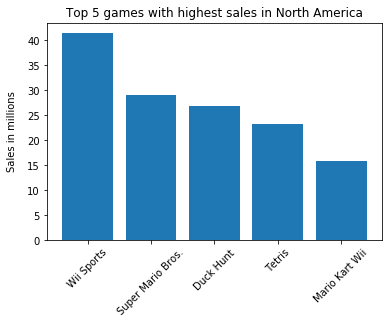

In [29]:
# top 5 selling video games in NA
plt.bar(vg.sort_values("NA_Sales", ascending = False)[0:5].Name, vg.sort_values("NA_Sales", ascending = False)[0:5].NA_Sales);
plt.xticks(rotation=45);
plt.ylabel("Sales in millions",labelpad=10);
plt.title("Top 5 games with highest sales in North America");

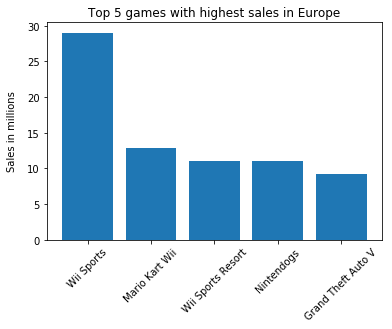

In [31]:
# top 5 selling video games in Europe
plt.bar(vg.sort_values("EU_Sales", ascending = False)[0:5].Name, vg.sort_values("EU_Sales", ascending = False)[0:5].EU_Sales);
plt.xticks(rotation=45);
plt.ylabel("Sales in millions",labelpad=10);
plt.title("Top 5 games with highest sales in Europe");

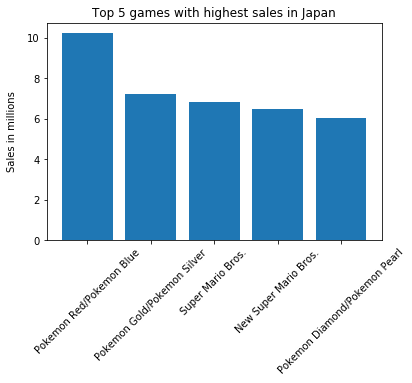

In [32]:
# top 5 selling video games in Japan 
plt.bar(vg.sort_values("JP_Sales", ascending = False)[0:5].Name, vg.sort_values("JP_Sales", ascending = False)[0:5].JP_Sales);
plt.xticks(rotation=45);
plt.ylabel("Sales in millions",labelpad=10);
plt.title("Top 5 games with highest sales in Japan");

Pokemon games are valued highly in Japan but not in North America or Europe

### What are the top 5 highest selling publishers in each market?

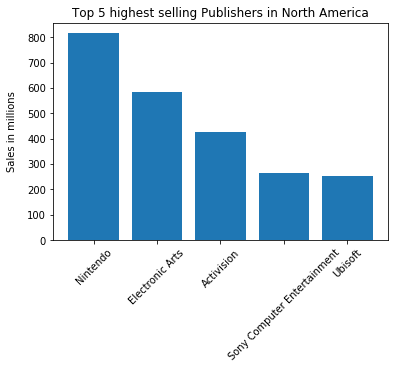

In [76]:
# top 5 highest selling publishers in NA
na_pub = vg.groupby("Publisher")["NA_Sales"].sum().reset_index()
na_pub = na_pub.sort_values("NA_Sales", ascending=False)[0:5]

plt.bar(na_pub.Publisher, na_pub.NA_Sales);
plt.xticks(rotation=45);
plt.ylabel("Sales in millions",labelpad=10);
plt.title("Top 5 highest selling Publishers in North America");

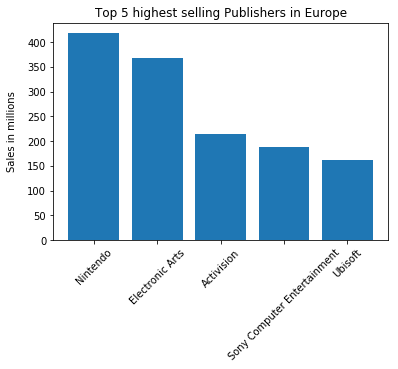

In [78]:
# top 5 highest selling publishers in Europe
eu_pub = vg.groupby("Publisher")["EU_Sales"].sum().reset_index()
eu_pub = eu_pub.sort_values("EU_Sales", ascending=False)[0:5]

plt.bar(eu_pub.Publisher, eu_pub.EU_Sales);
plt.xticks(rotation=45);
plt.ylabel("Sales in millions",labelpad=10);
plt.title("Top 5 highest selling Publishers in Europe");

The same publishers and trends exist in North America and Europe.

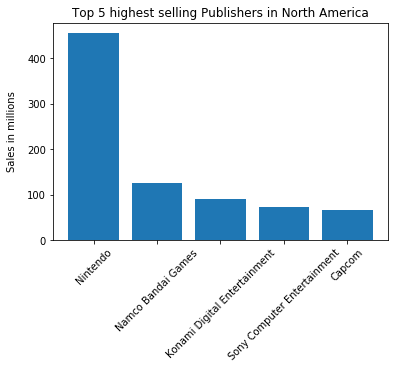

In [82]:
# top 5 highest selling publishers in NA
jp_pub = vg.groupby("Publisher")["JP_Sales"].sum().reset_index()
jp_pub = jp_pub.sort_values("JP_Sales", ascending=False)[0:5]

plt.bar(jp_pub.Publisher, jp_pub.JP_Sales);
plt.xticks(rotation=45);
plt.ylabel("Sales in millions",labelpad=10);
plt.title("Top 5 highest selling Publishers in North America");

The Japanese market exist somewhat different behavior than the North American and European markets.

## 2. What genres are trending in each market?

In [ ]:
# feature for decade

vg['decade'] = ''

ctr = 0

for year in vg.Year:
    if (year >= 1980) & (year < 1990):
        vg.loc[ctr, 'decade'] = '1980_1990'
        ctr = ctr + 1
    elif (year >= 1990) & (year < 2000):   
        vg.loc[ctr, 'decade'] = '1990_2000'
        ctr = ctr + 1
    elif (year >= 2000) & (year < 2010):
        vg.loc[ctr, 'decade'] = '2000_2010'
        ctr = ctr + 1
    elif (year >= 2010) & (year <= 2020):
        vg.loc[ctr, 'decade'] = '2000_2020'
        ctr = ctr + 1

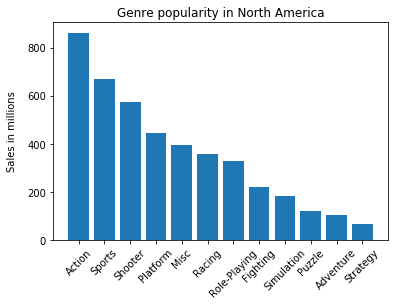

In [86]:
# top 5 highest selling publishers in NA
na_genre = vg.groupby("Genre")["NA_Sales"].sum().reset_index()
na_genre = na_genre.sort_values("NA_Sales", ascending=False)

plt.bar(na_genre.Genre, na_genre.NA_Sales);
plt.xticks(rotation=45);
plt.ylabel("Sales in millions",labelpad=10);
plt.title("Genre popularity in North America");

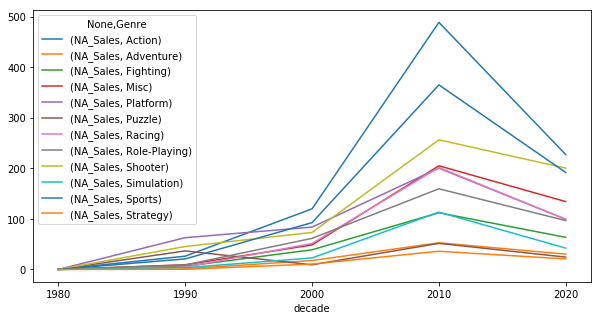

In [168]:
vg.groupby(['decade','Genre']).agg({'NA_Sales':sum}).unstack().plot(figsize=(10,5));
plt.xticks(np.arange(5), ('1980', '1990', '2000', '2010','2020'));

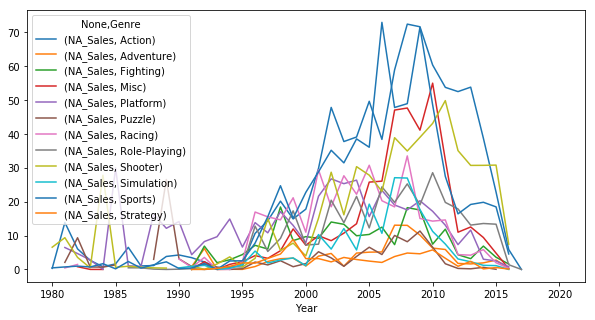

In [170]:
vg.groupby(['Year','Genre']).agg({'NA_Sales':sum}).unstack().plot(figsize=(10,5));

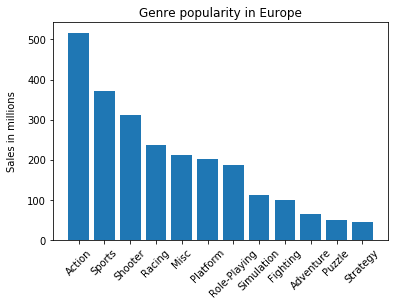

In [87]:
# top 5 highest selling publishers in NA
eu_genre = vg.groupby("Genre")["EU_Sales"].sum().reset_index()
eu_genre = eu_genre.sort_values("EU_Sales", ascending=False)

plt.bar(eu_genre.Genre, eu_genre.EU_Sales);
plt.xticks(rotation=45);
plt.ylabel("Sales in millions",labelpad=10);
plt.title("Genre popularity in Europe");

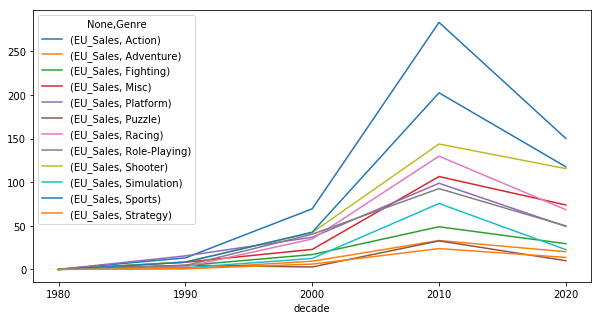

In [171]:
vg.groupby(['decade','Genre']).agg({'EU_Sales':sum}).unstack().plot(figsize=(10,5));
plt.xticks(np.arange(5), ('1980', '1990', '2000', '2010','2020'));

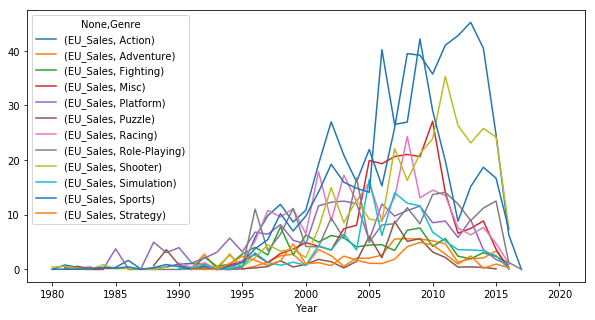

In [153]:
vg.groupby(['Year','Genre']).agg({'EU_Sales':sum}).unstack().plot(figsize=(10,5));

North America and Europe exhibit very similar behavior in terms of what genres are popular.

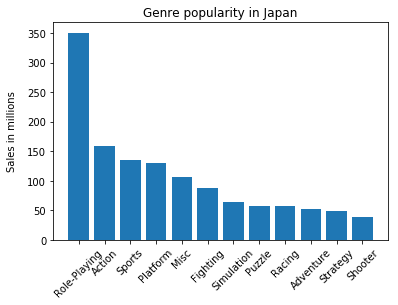

In [88]:
# top 5 highest selling publishers in NA
jp_genre = vg.groupby("Genre")["JP_Sales"].sum().reset_index()
jp_genre = jp_genre.sort_values("JP_Sales", ascending=False)

plt.bar(jp_genre.Genre, jp_genre.JP_Sales);
plt.xticks(rotation=45);
plt.ylabel("Sales in millions",labelpad=10);
plt.title("Genre popularity in Japan");

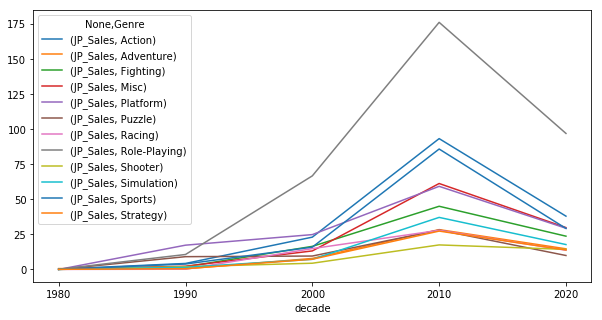

In [172]:
vg.groupby(['decade','Genre']).agg({'JP_Sales':sum}).unstack().plot(figsize=(10,5));
plt.xticks(np.arange(5), ('1980', '1990', '2000', '2010','2020'));

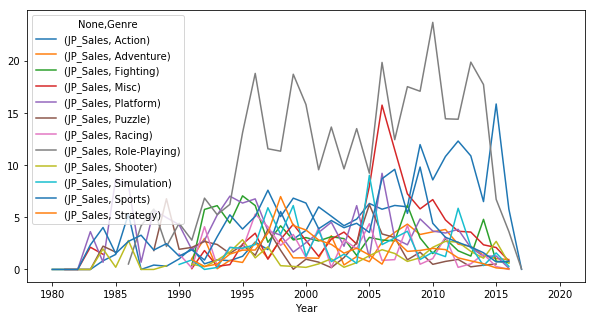

In [154]:
vg.groupby(['Year','Genre']).agg({'JP_Sales':sum}).unstack().plot(figsize=(10,5));

Japan exhibits very different behavior - Role playing games are most popular, and in Europe and North America <br> they are 7th most popular. 
Surprisingly - Shooter games are least popular in Japan, despite being one of the most popular genres in North America and Europe.

## What features of a video game are indicative of success?

Building a model and get feature importances

In [142]:
vg = vg.dropna()
vg.shape

(16291, 12)

In [143]:
# select the target/response
y = vg.NA_Sales

# features
features = ['Platform','Genre','Publisher','decade']
x = vg[features]

# one hot encode
x = pd.get_dummies(x)

In [144]:
# split data into train and test
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x,y,random_state=0)

In [146]:
# fit model with training data
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=0)
rf_model.fit(train_x, train_y)

# make predictions with test data
predictions = rf_model.predict(test_x)

# evaluate model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(test_y, predictions)
rmsle = np.sqrt(mean_squared_log_error(test_y, predictions))
r2 = r2_score(test_y, predictions)
mse = mean_squared_error(test_y,predictions)
print('Mean absolute error is:', round(mae,2))
print('RMSLE:', round(rmsle,2))
print('MSE:', round(mse,2))
print('r2:', round(r2,2))

Mean absolute error is: 0.27
RMSLE: 0.28
MSE: 0.65
r2: 0.01


In [162]:
# feature importances
importances = list(rf_model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: Platform             Importance: 0.01
Variable: Publisher            Importance: 0.01
Variable: Genre                Importance: 0.0
Variable: decade               Importance: 0.0
